# GPS And Barometer Measurement

The the vehicle altitude can be estimated using altitude measurements from GPS and barometer sensors. GPS measurements with 10Hz rate and it has $\sigma_{GPS} = 10m$. Barometer measures altitude with 100Hz and it has error of $\sigma_{baro} = 1m$.

The goal of this exercise is to combine these two measurements and estimate the vehicle altitude assuming it remains constant. 

In [3]:
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'

import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from Measurements import gps_and_barometer_measurements

pylab.rcParams['figure.figsize'] = 10, 10

The measured data can be obtained from the `gps_and_barometer_measurements` function. It contains:

 - GPS measurement time 
 - GPS altitude
 - sigma value for GPS unit
 - barometer measurement time 
 - barometer altitude
 - sigma value of barometer 

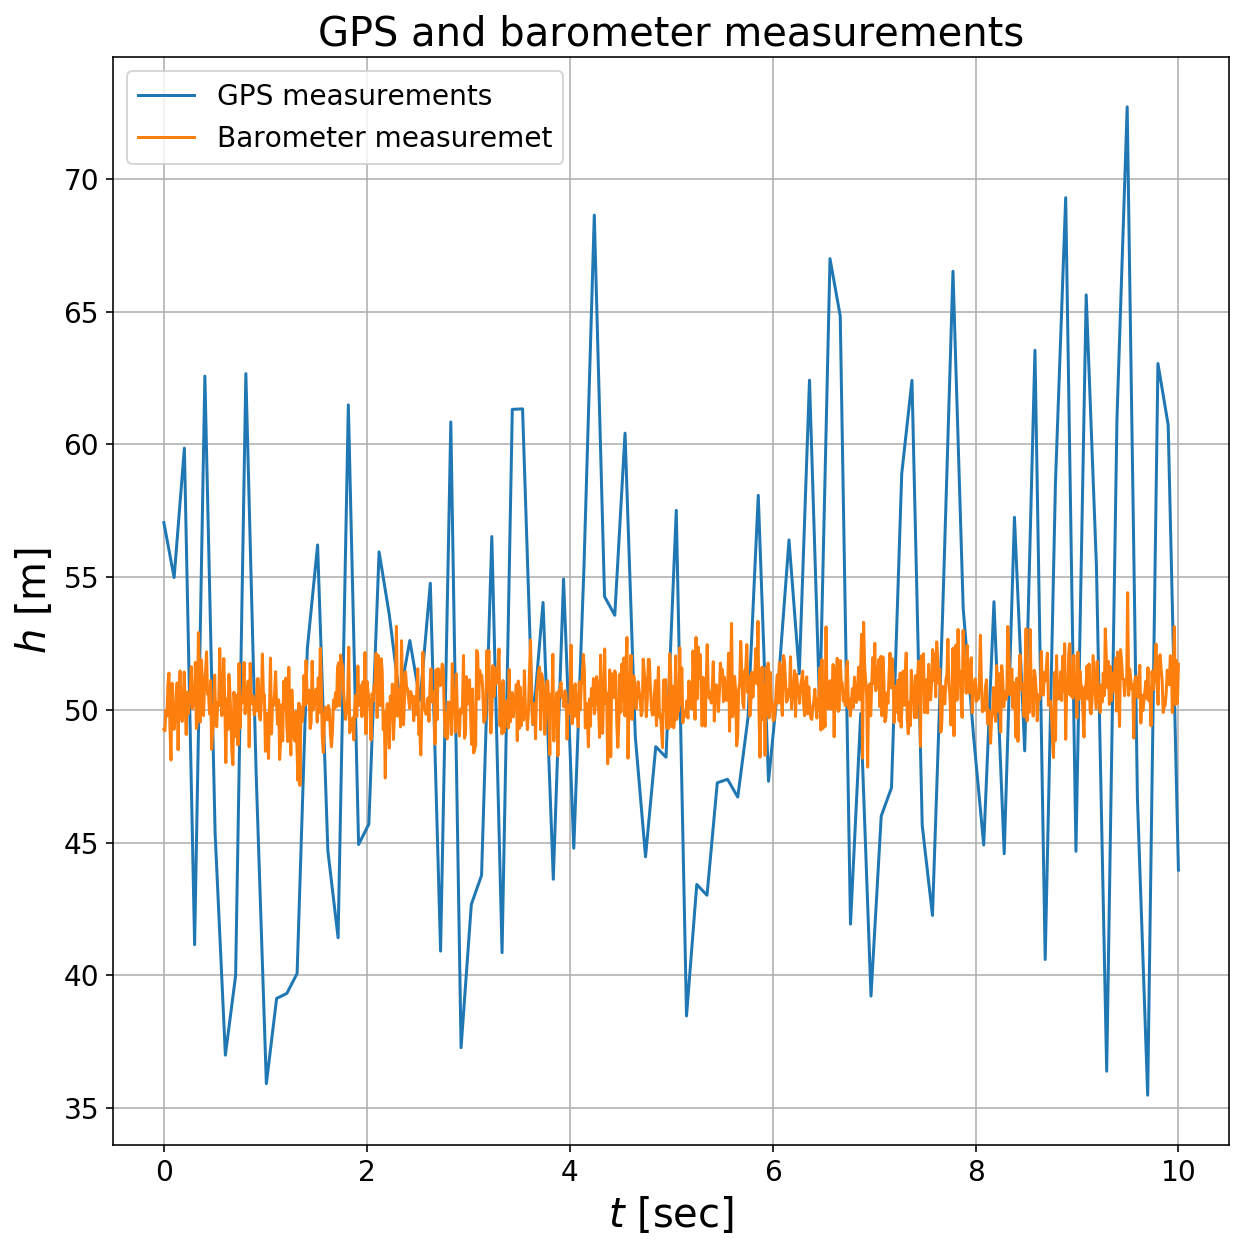

In [4]:
# Loading and plotting the measurement data 
gps_t, gps_data, sigma_gps, baro_t, baro_data, sigma_baro = gps_and_barometer_measurements()

plt.plot(gps_t, gps_data)
plt.plot(baro_t, baro_data)
plt.legend(['GPS measurements','Barometer measuremet'],fontsize = 14)
plt.title('GPS and barometer measurements').set_fontsize(20)
plt.xlabel('$t$ [sec]').set_fontsize(20)
plt.ylabel('$h$ [m]').set_fontsize(20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.grid()
plt.show()

### Altitude estimation 

In lesson 1 you became familiar with the Recursive Estimation method. You will use it in this exercise to estimate the altitude of the stationary vehicle. As a reminder the update equations are presented:

$$
Q_{t+1} = (Q_{t}^{-1} + H^T R^{-1} H)^{-1}\\
\hat{x}_{t+1} = \hat{x_t} + Q_{t+1} H^{T} R^{-1} (\tilde{y_t} - H \hat{x_t})
$$

We assume that initial altitude estimation is an average value of the barometer and GPS measurements at an initial time. 

In [5]:
Q = np.eye(1)   # Covariance 
H = np.eye(1)
h_hat = 0.5*(gps_data[0] + baro_data[0]) 
R = np.eye(1)*sigma_baro 

Estimating the altitude of the vehicle in time. 

In [6]:
h_hat_history = np.array([h_hat[0]])

k_gps = 0  # an element from GPS measurement data 

for i in range(baro_t.shape[0]):
    if gps_t[k_gps] <= baro_t[i]: # If new GPS measurement has arrived 
        h_obs = gps_data[k_gps]   # Observed h value  
        R = np.eye(1)*sigma_gps   # measuring sigma is gps sigma
        k_gps+=1                  # advance to the next measurement point
        i-=1     # What this does is that it will update altitude based on the GPS and then 
                 # will come back and update the altitude estimation using the barometer measurement.
                 # This will be done without losing the proper count. 
    else:
        h_obs = baro_data[i]      # Observed h value using the barometer 
        R = np.eye(1)*sigma_baro  # Measuring sigma is barometer sigma

    # TODO: Use recursive estimator from lesson 1 to evalueat the altitude
    Q = np.linalg.pinv(np.linalg.pinv(Q) + H.T @ np.linalg.pinv(R) @ H)
    h_hat = h_hat + Q @ H.T @ np.linalg.pinv(R) @ (h_obs - H @ h_hat)
    
    # creating the historical data of the h_hat in time 
    h_hat_history = np.vstack((h_hat_history,h_hat))
    

Plotting measured data and the estimated value.

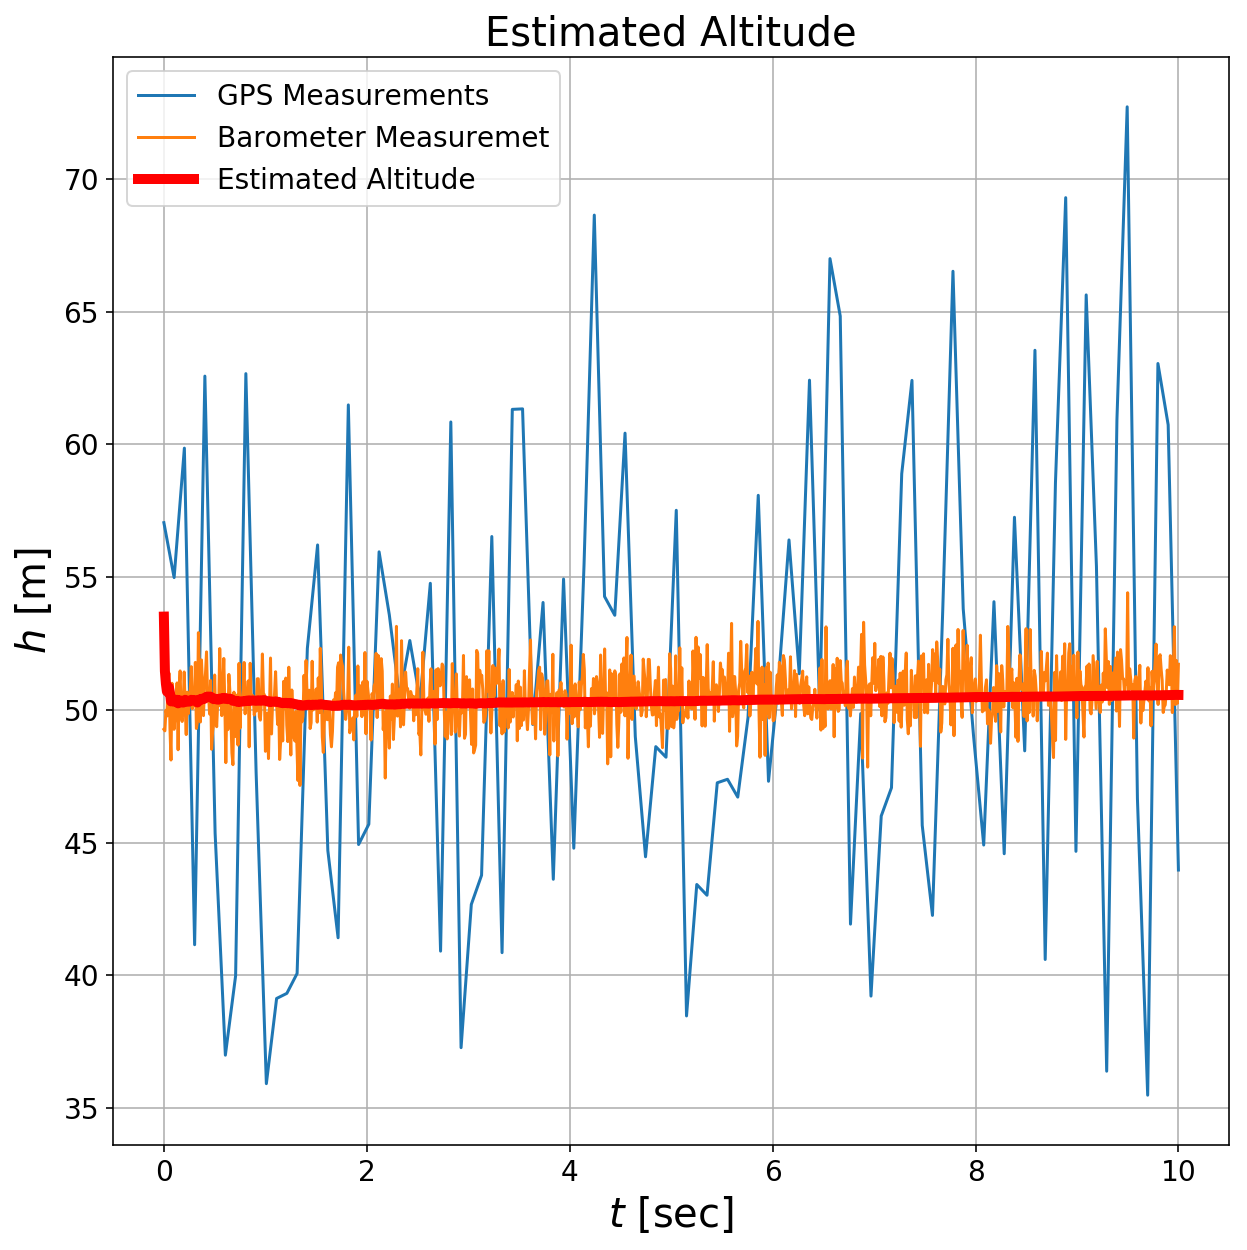

In [7]:
plt.plot(gps_t, gps_data)
plt.plot(baro_t, baro_data)
plt.plot(baro_t, h_hat_history[1:], color='red',linewidth=5)
plt.legend(['GPS Measurements', 'Barometer Measuremet', 'Estimated Altitude'], fontsize = 14)
plt.title('Estimated Altitude').set_fontsize(20)
plt.xlabel('$t$ [sec]').set_fontsize(20)
plt.ylabel('$h$ [m]').set_fontsize(20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.grid()
plt.show()